# Routing to IO

## Routing electrical
For routing low speed DC electrical ports you can use sharp corners instead of smooth bends.

You can also define `port.orientation = None` to ignore the port orientation for low speed DC ports.

For single route between ports you can use `route_single_electrical`

### route_single_electrical


`route_single_electrical` has `bend = wire_corner` with a 90deg bend corner.

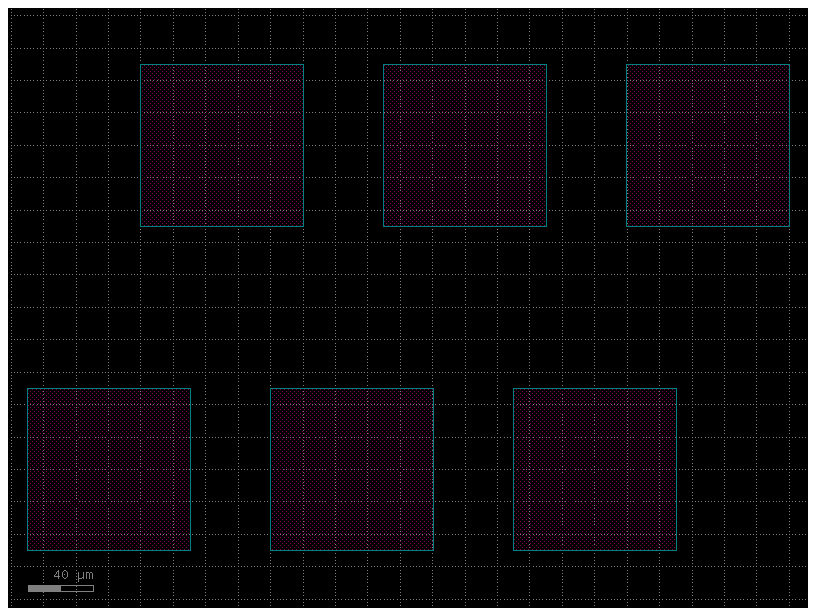

In [2]:
import gdsfactory as gf
from gdsfactory.samples.big_device import big_device

gf.config.rich_output()

c = gf.Component()
pt = c << gf.components.pad_array(port_orientation=270, columns=3)
pb = c << gf.components.pad_array(port_orientation=90, columns=3)
pt.dmove((70, 200))
c.plot()

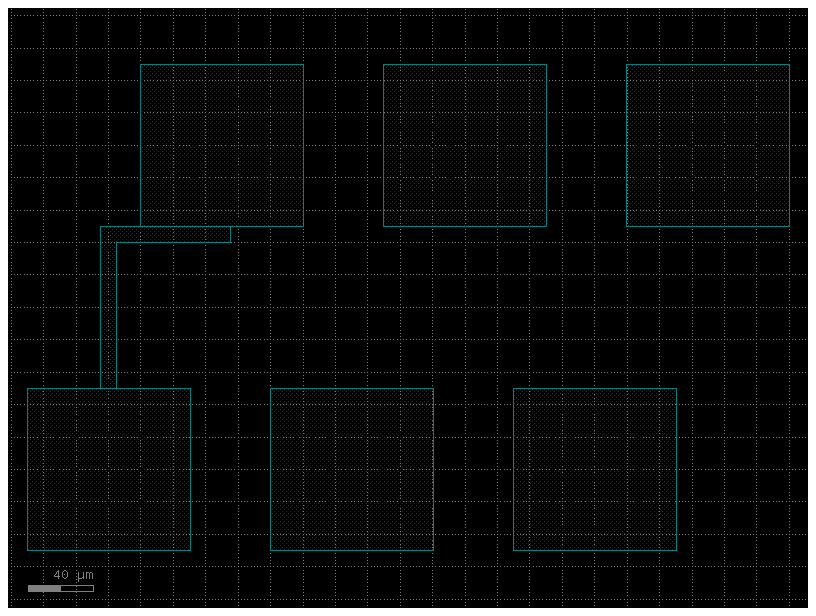

In [3]:
c = gf.Component()
pt = c << gf.components.pad_array(port_orientation=270, columns=3)
pb = c << gf.components.pad_array(port_orientation=90, columns=3)
pt.dmove((70, 200))
route = gf.routing.route_single_electrical(c, pt.ports["e11"], pb.ports["e11"])
c.plot()

There is also `bend = wire_corner45` for 45deg bend corner with parametrizable "radius":

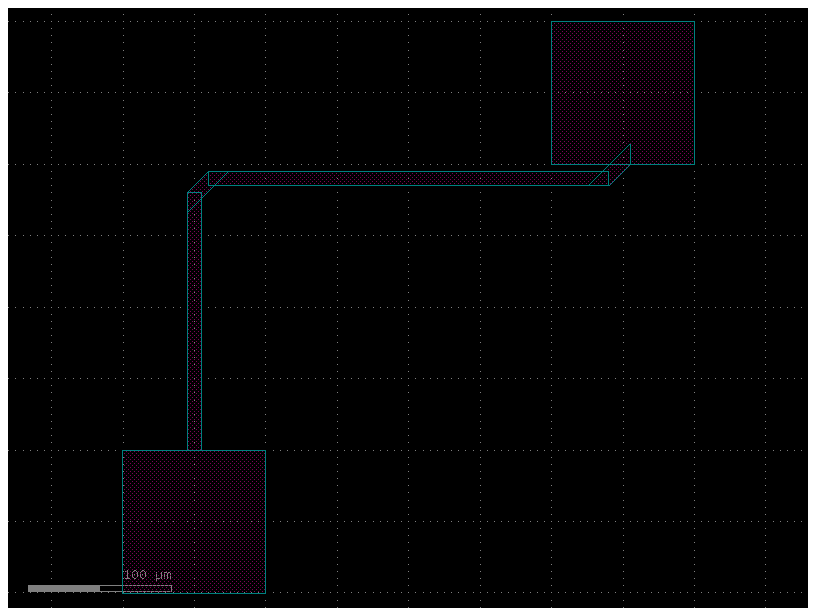

In [4]:
c = gf.Component()
pt = c << gf.components.pad_array(port_orientation=270, columns=1)
pb = c << gf.components.pad_array(port_orientation=90, columns=1)
pt.dmove((300, 300))
route = gf.routing.route_single(
    c,
    pt.ports["e11"],
    pb.ports["e11"],
    bend="wire_corner45",
    port_type="electrical",
    cross_section="metal_routing",
    allow_width_mismatch=True,
    auto_taper=False
)
c.plot()

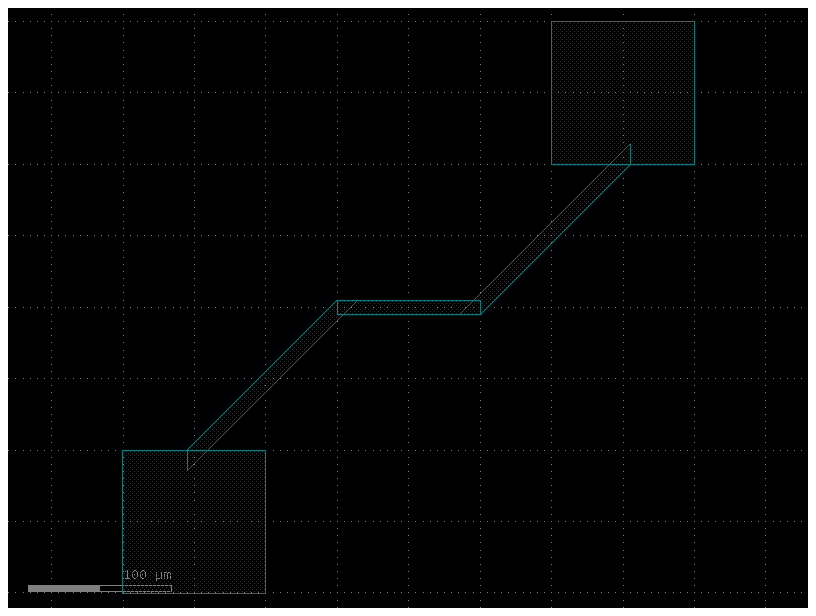

In [5]:
c = gf.Component()
pt = c << gf.components.pad_array(port_orientation=270, columns=1)
pb = c << gf.components.pad_array(port_orientation=90, columns=1)
pt.dmove((300, 300))
route = gf.routing.route_single(
    c,
    pt.ports["e11"],
    pb.ports["e11"],
    bend="wire_corner45",
    radius=100,
    auto_taper=None,
    cross_section="metal_routing",
    port_type="electrical",
    allow_width_mismatch=True,
)
c.plot()

### route_quad

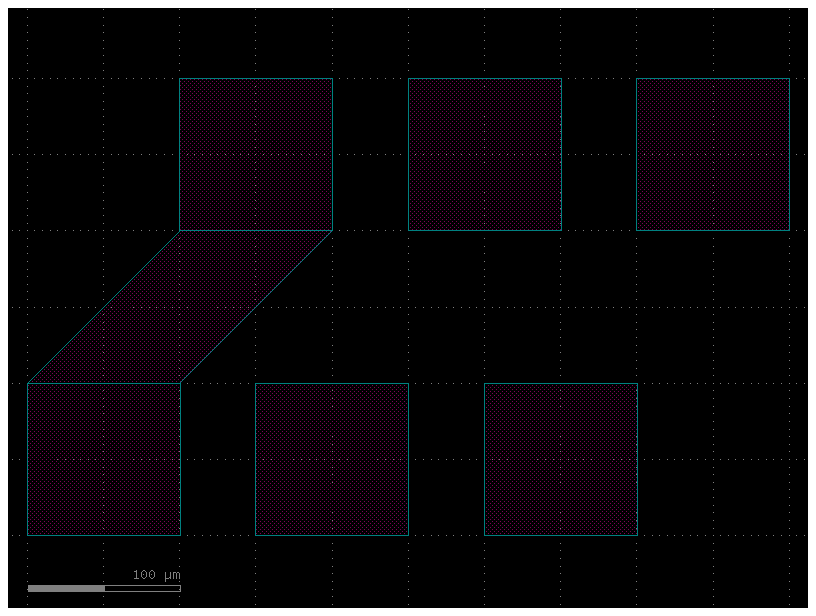

In [6]:
c = gf.Component()
pt = c << gf.components.pad_array(port_orientation=270, columns=3)
pb = c << gf.components.pad_array(port_orientation=90, columns=3)
pt.dmove((100, 200))
gf.routing.route_quad(c, pt.ports["e11"], pb.ports["e11"], layer=(49, 0))
c.plot()

### route_single

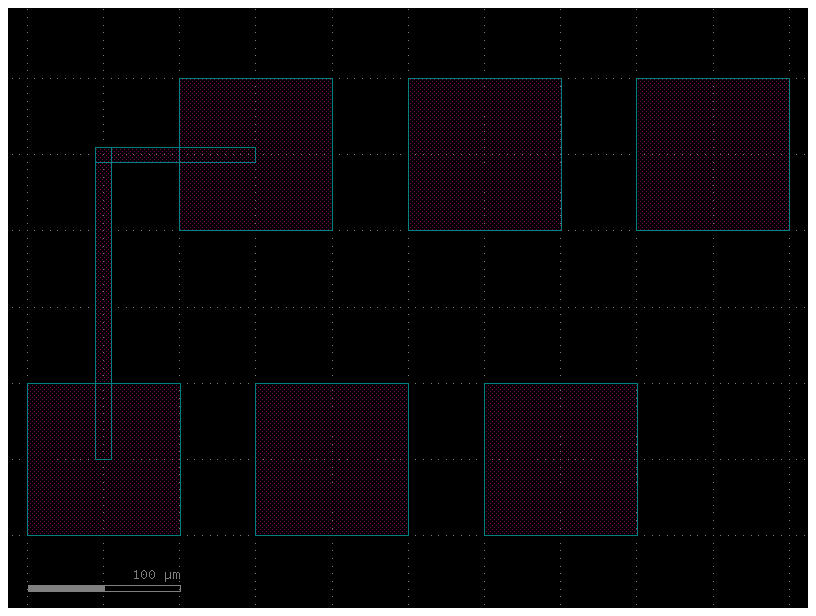

In [7]:
import gdsfactory as gf

c = gf.Component()
pt = c << gf.components.pad_array(port_orientation=270, columns=3, centered_ports=True)
pb = c << gf.components.pad_array(port_orientation=90, columns=3, centered_ports=True)
pt.dmove((100, 200))
route = gf.routing.route_single(
    c,
    pb.ports["e11"],
    pt.ports["e11"],
    steps=[
        {"y": 200},
    ],
    cross_section="metal_routing",
    bend=gf.components.wire_corner,
    port_type="electrical",
    allow_width_mismatch=True,
    auto_taper=False,
)
c.plot()

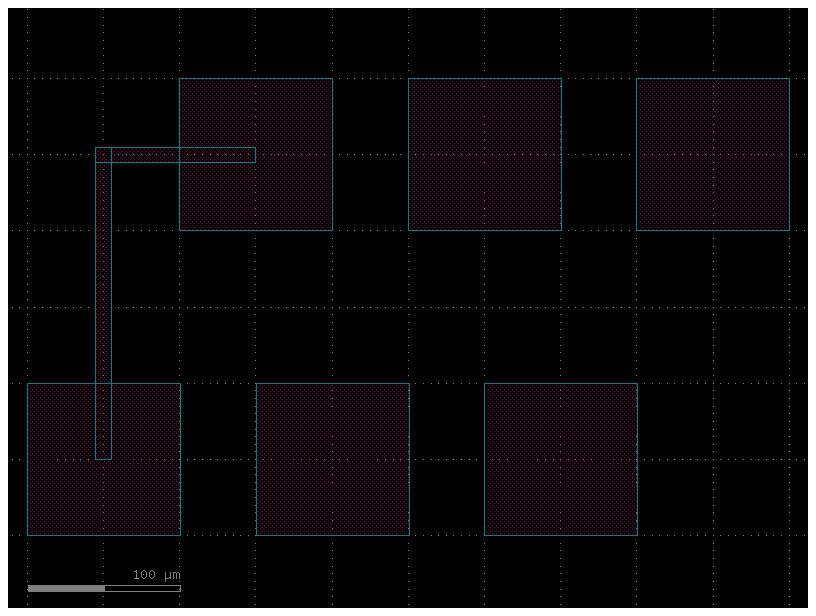

In [8]:
c = gf.Component()
pt = c << gf.components.pad_array(columns=3, centered_ports=True)
pb = c << gf.components.pad_array(columns=3, centered_ports=True)
pt.move((100, 200))
route = gf.routing.route_single(
    c,
    pb.ports["e11"],
    pt.ports["e11"],
    steps=[
        {"y": 200},
    ],
    cross_section="metal_routing",
    bend=gf.components.wire_corner,
    port_type="electrical",
    allow_width_mismatch=True,
    auto_taper=False,
)
c.plot()

### route_bundle_electrical

For routing groups of ports you can use `route_bundle` that returns a bundle of routes using a bundle router (also known as bus or river router)

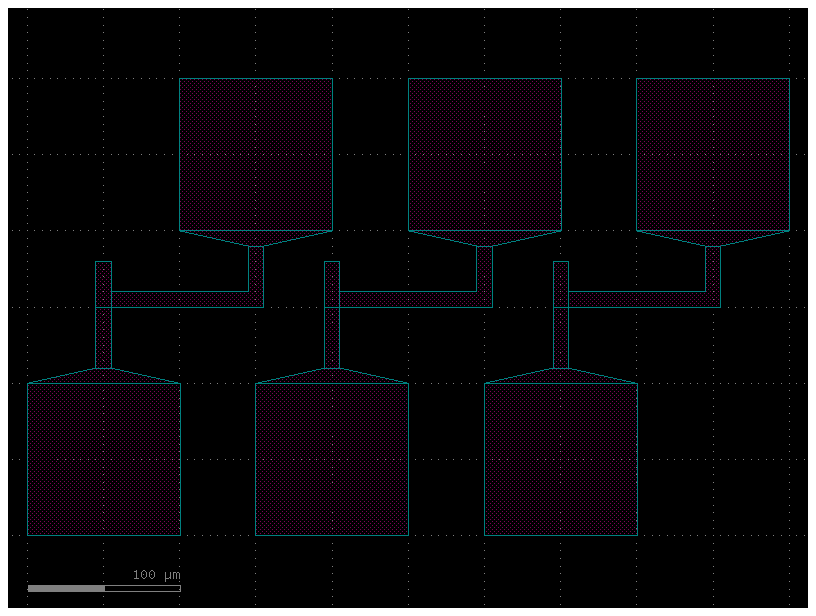

In [9]:
c = gf.Component()
pt = c << gf.components.pad_array(port_orientation=270, columns=3, centered_ports=False)
pb = c << gf.components.pad_array(port_orientation=90, columns=3, centered_ports=False)
pt.move((100, 200))

routes = gf.routing.route_bundle_electrical(
    c, 
    pb.ports, 
    pt.ports, 
    start_straight_length=30, 
    separation=30,
    cross_section="metal_routing",
)
c.plot()

## Routing to pads

You can also route to electrical pads.

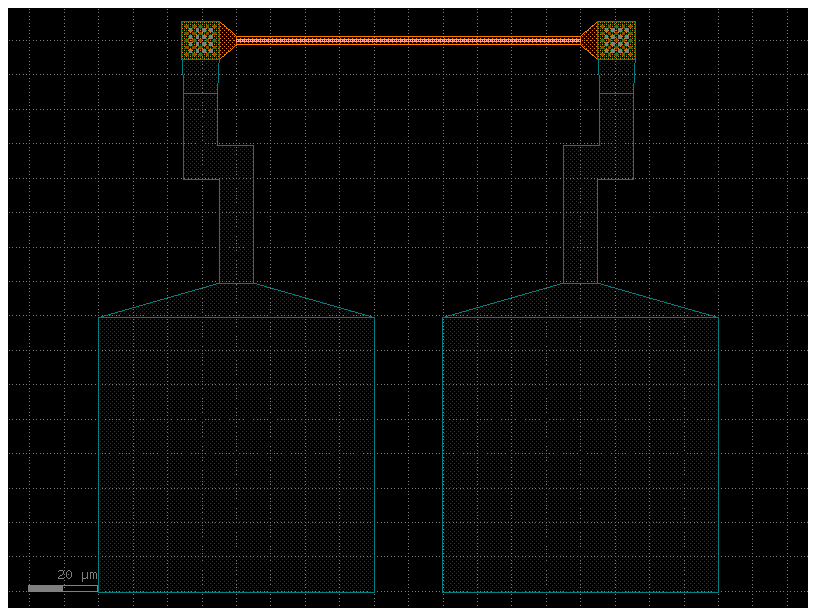

In [10]:
c = gf.components.straight_heater_metal(length=100.0)
cc = gf.routing.add_pads_bot(component=c, port_names=("l_e4", "r_e4"), fanout_length=80)
cc.plot()

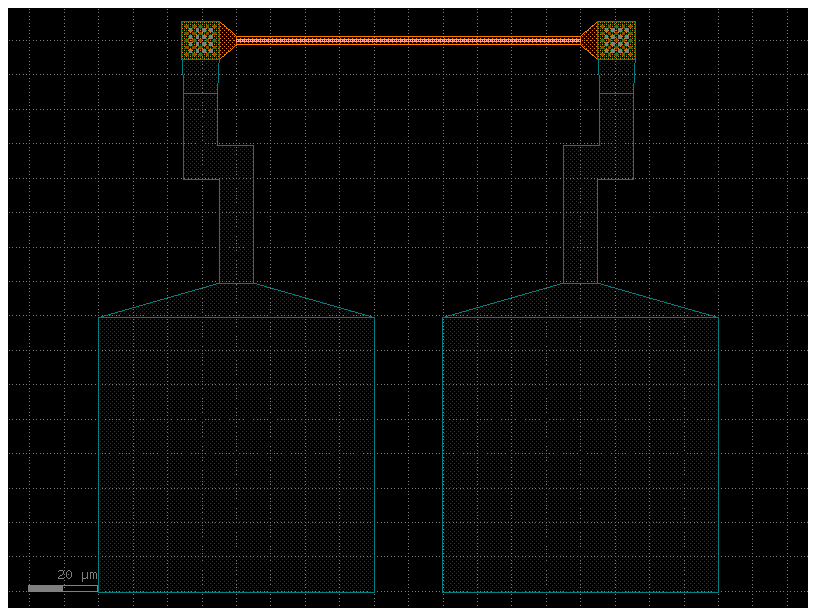

In [11]:
c = gf.components.straight_heater_metal(length=100.0)
cc = gf.routing.add_pads_bot(component=c, port_names=("l_e4", "r_e4"), fanout_length=80)
cc.plot()

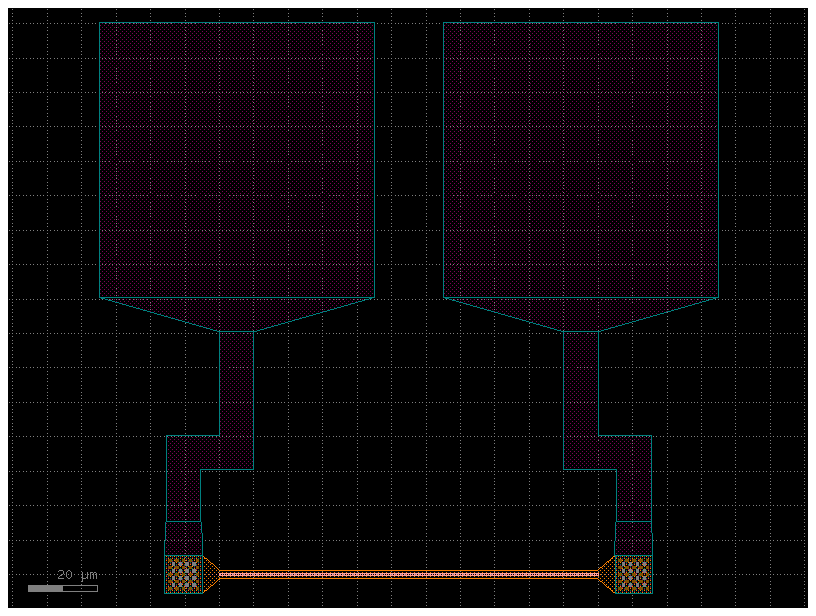

In [12]:
c = gf.components.straight_heater_metal(length=110)
cc = gf.routing.add_pads_top(component=c, port_names=("l_e4", "r_e4"), fanout_length=80)
cc.plot()

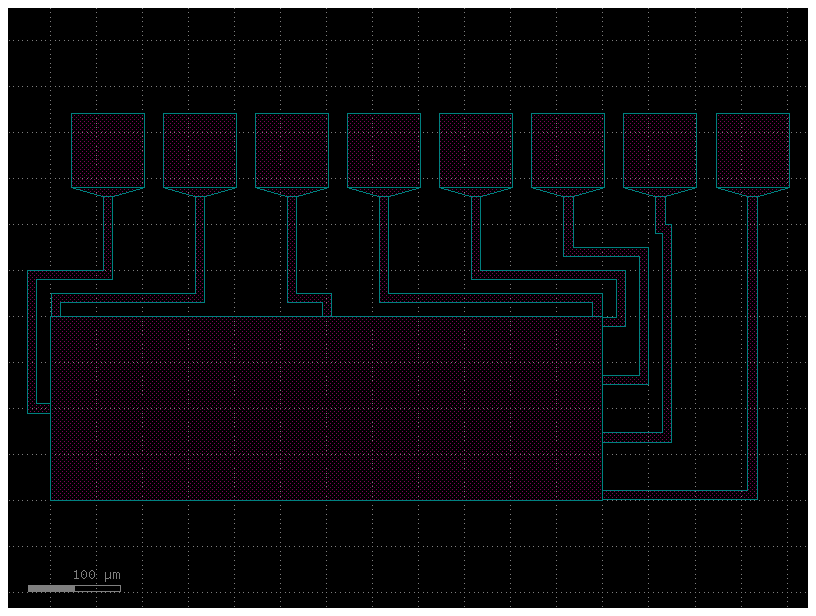

In [13]:
c = gf.c.nxn(
    xsize=600,
    ysize=200,
    north=0,
    south=3,
    wg_width=10,
    layer="M3",
    port_type="electrical",
)
cc = gf.routing.add_pads_top(component=c, fanout_length=100)
cc.plot()

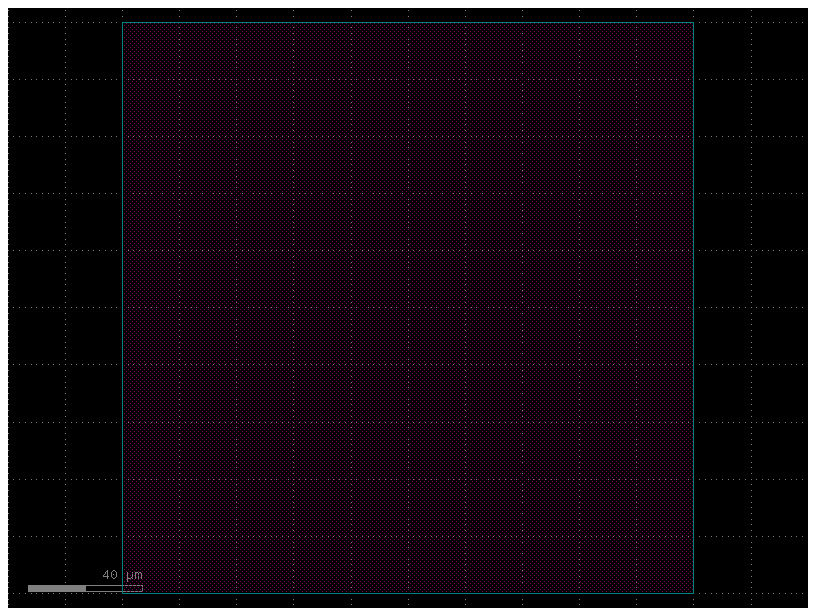

In [26]:
n = west = north = south = east = 10
spacing = 20
c = gf.components.nxn(
    xsize=n * spacing,
    ysize=n * spacing,
    west=west,
    east=east,
    north=north,
    south=south,
    port_type="electrical",
    wg_width=10,
    layer="M3",
)
c.plot()

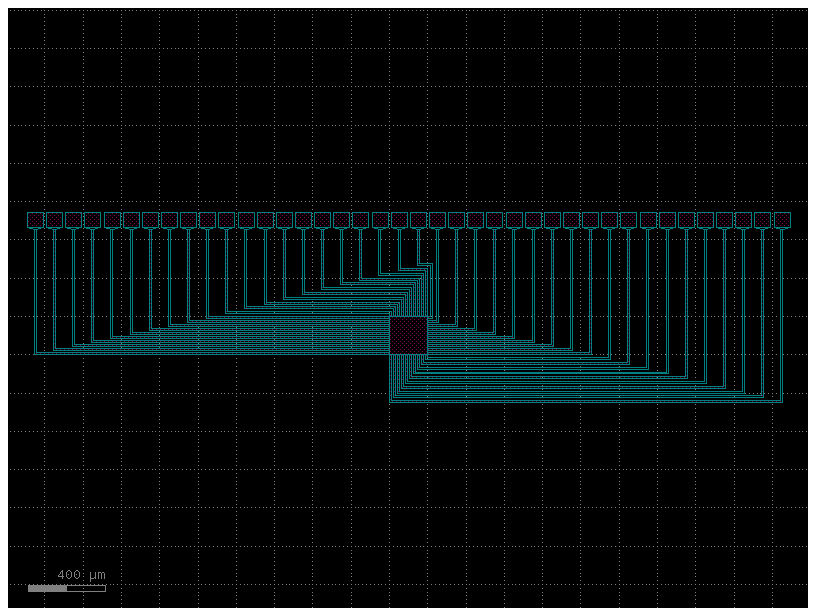

In [27]:
cc = gf.routing.add_pads_top(component=c, fanout_length=-280)
cc.plot()

## Routing to optical terminations

### Route to Fiber Array

You can route to a fiber array.

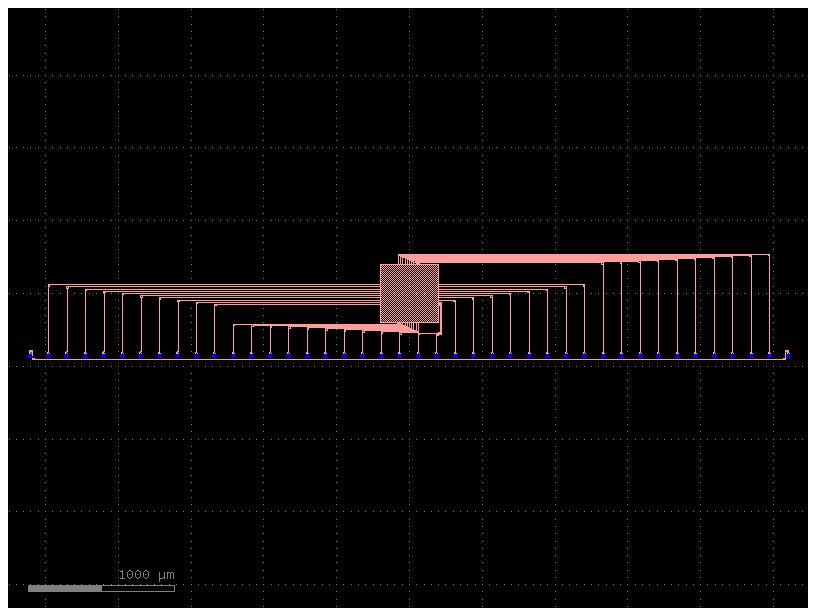

In [16]:
component = big_device(nports=10)
c = gf.routing.add_fiber_array(component=component, radius=10.0, fanout_length=60.0)
c.plot()

You can also mix and match TE and TM grating couplers. Notice that the `TM` polarization grating coupler is bigger.

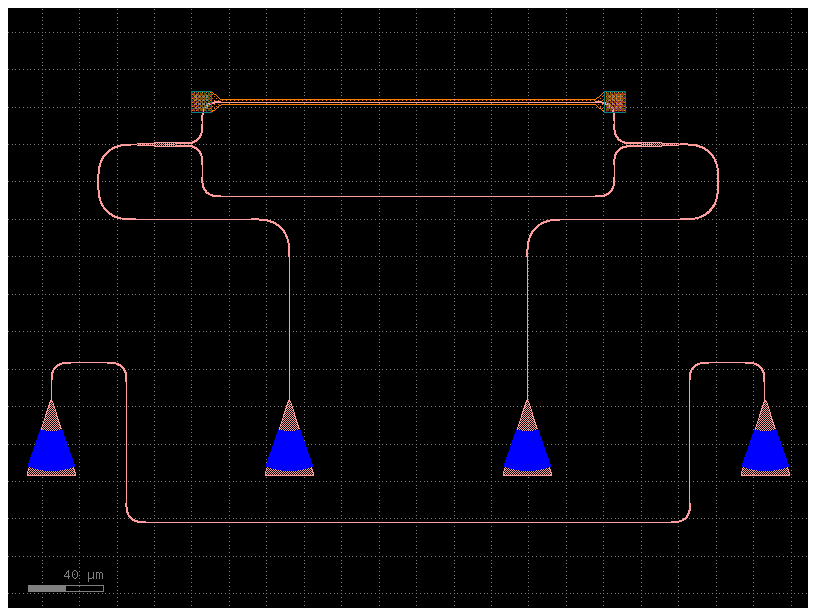

In [17]:
import gdsfactory as gf

c = gf.components.mzi_phase_shifter()
gcte = gf.components.grating_coupler_te

cc = gf.routing.add_fiber_array(
    component=c,
    grating_coupler=gf.components.grating_coupler_te,
    radius=20,
)
cc.plot()

### Route to edge couplers

You can also route Edge couplers to a fiber array or to both sides of the chip.

For routing to both sides you can follow different strategies:

1. Place the edge couplers and route your components to the edge couplers.
2. Extend your component ports to each side.
3. Anything you imagine ...

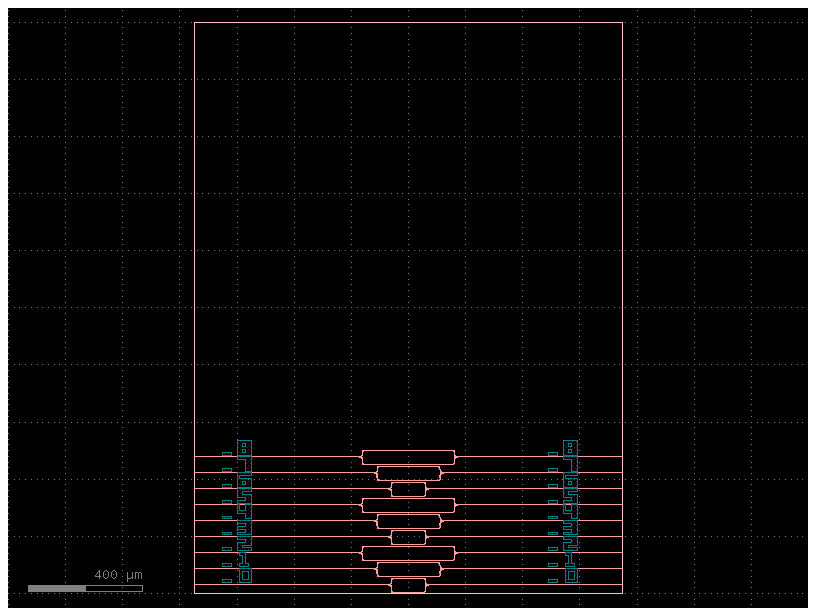

In [22]:
from functools import partial
from gdsfactory.generic_tech import LAYER


@gf.cell
def sample_reticle(
    size=(1500, 2000),
    ec="edge_coupler_silicon",
    bend_s=partial(gf.c.bend_s, size=(100, 100)),
) -> gf.Component:
    """Returns MZI with edge couplers.

    Args:
        size: size of the reticle.
        ec: edge coupler component name.
        bend_s: bend_s component.
    """
    mzis = [gf.components.mzi(length_x=lengths) for lengths in [100, 200, 300]]
    copies = 3  # number of copies of each component
    components = mzis * copies

    xsizes = [component.xsize for component in components]
    xsize_max = max(xsizes)
    ec = gf.get_component(ec)
    taper = gf.components.taper(width2=0.5)
    components_ec = []

    if xsize_max + 2 * taper.xsize + 2 * ec.xsize > size[0]:
        raise ValueError(
            f"Component xsize_max={xsize_max} is larger than reticle size[0]={size[0]}"
        )

    if bend_s:
        bend_s = gf.get_component(bend_s)

    for component in components:
        if bend_s:
            component = gf.components.extend_ports(
                component, extension=bend_s, port1="o1", port2="o2"
            )
            extension_length = (
                size[0]
                - 2 * taper.xsize
                - 2 * ec.xsize
                - component.xsize
                - 2 * bend_s.xsize
            ) / 2
        else:
            extension_length = (
                size[0] - 2 * taper.xsize - 2 * ec.xsize - component.xsize
            ) / 2

        component_extended = gf.components.extend_ports(
            component,
            extension=gf.components.straight(extension_length),
            port2="o2",
            port1="o1",
        )

        component_tapered = gf.components.extend_ports(
            component_extended, extension=taper, port2="o2", port1="o1"
        )
        component_ec = gf.components.extend_ports(
            component_tapered, extension=ec, port1="o1", port2="o2"
        )
        components_ec.append(component_ec)

    c = gf.Component()
    fp = c << gf.components.rectangle(size=size, layer=LAYER.FLOORPLAN)

    text_offset_y = 10
    text_offset_x = 100

    grid = c << gf.grid_with_text(
        components_ec,
        shape=(len(components), 1),
        text=partial(gf.c.text_rectangular, layer=LAYER.M3),
        text_offsets=(
            (-size[0] / 2 + text_offset_x, text_offset_y),
            (+size[0] / 2 - text_offset_x - 160, text_offset_y),
        ),
    )
    fp.x = grid.x
    return c


c = sample_reticle(bend_s=None)
c.plot()

To avoid straight light you can also include an Sbend.

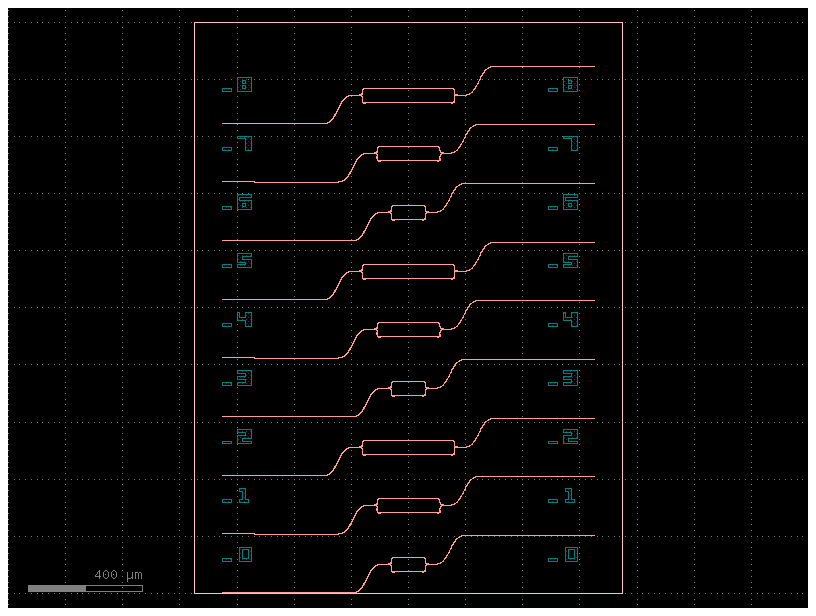

In [23]:
c = sample_reticle()
c.plot()